<a href="https://colab.research.google.com/github/Mesy-Ariani/Prediction-of-Heart-Disease/blob/main/Prediction_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Case Study : Prediction of Heart Disease**

> Mesy Diah Ariani (DS04068)






---
# 1. Define business problems, metrics, goals
---




### **Business Problem**
Saat ini tantangan terbesar bagi industri medis adalah untuk menyediakan fasilitas tingkat tinggi pada infrastruktur kesehatan untuk mendiagnosa penyakit pada hari pertama dan memberikan perawatan tepat waktu untuk meningkatkan kualitas hidup melalui kualitas layanan. Sekitar 31% kematian terjadi di dunia karena penyakit jantung. Bahkan, Menurut WHO, Cardiovaskular Disease (CVD) adalah penyebab utama kematian secara global, merenggut sekitar 17.9 juta jiwa setiap tahun. Negara berkembang dan dibawahnya kekurangan infrastruktur dan teknologi, infrastruktur dan dokter untuk memprediksi penyakit pada tahap awal untuk menghindari komplikasi mengurangi kematian. Pertumbuhan teknologi informasi dan telekomunikasi telah menguntungkan pasien kaya hingga miskin dengan memberikan informasi real time kepada pasien dengan biaya diagnosis dan pemantauan kesehatan pasien yang lebih rendah. Hal ini telah meningkatkan detail catatan kesehatan pasien secara dramatis. Rekam medis yang luas tersedia untuk penelitian. Industri medis menghadapi tantangan besar dalam menggunakan data medis yang sangat besar. Sejumlah besar data diubah untuk mendapatkan informasi yang berharga dan akurat dengan cepat oleh machine. Dengan demikian, Machine Learning adalah bidang yang penting. Model Machine Learning yang sangat berguna digunakan untuk menemukan pola tersembunyi dan korelasi antar fitur dalam kumpulan data sehingga dapat menentukan status penyakit jantung pasien.

> Saat ini, tantangan utama dan hal yang menjadi urgent industri medis adalah memprediksi heart disease dengan metode yang lebih murah dan lebih andal untuk menghindari penyakit compounding effect di negara berpenghasilan rendah atau negara berkembang. Deteksi dini tidak hanya mengurangi biaya tetapi juga meningkatkan kualitas hidup.




### **Metrics**
Dataset ini merupakan data sekunder yang diambil dari [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). Dataset ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. Ini berisi 76 atribut, termaksud yang akan diprediksi, tetapi semua percobaan yang dipublikasikan mengacu pada penggunaan subset dari 14 atribut tersebut. "Target" mengacu pada adanya penyakit jantung pada pasien, dengan 0 merepresentasikan tidak ada penyakit. Sedangkan 1, merepresentasikan ada penyakit. Berikut informasi detail mengenai 14 Artibut yang digunakan:

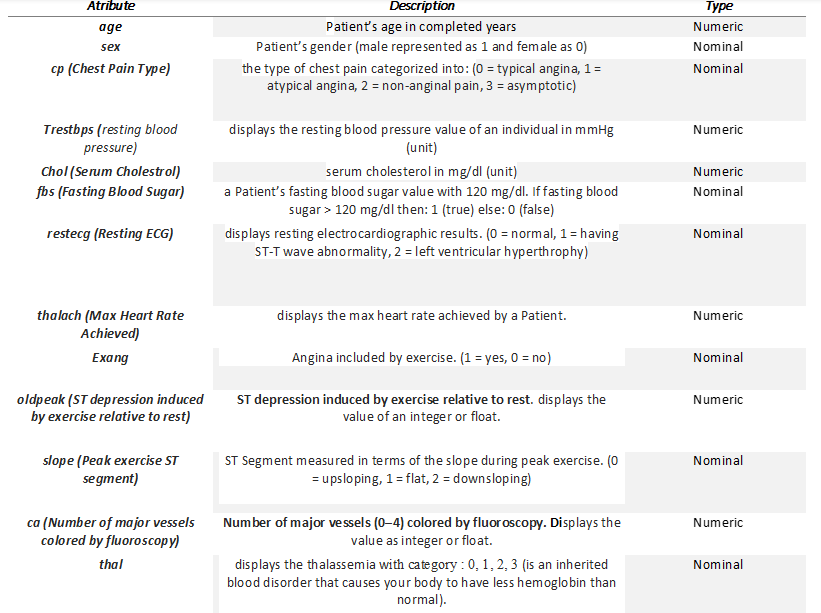

### Goals


> Tujuan akhir analisis ini adalah untuk mengklasifikasikan apakah pasien-pasien terdiagnosa heart disease atau tidak dan mengetahui feature-feature yang berpengaruh signifikan terhadap status heart disease. Prediksi ini diharapkan dapat mengurangi biaya tetapi juga meningkatkan kualitas hidup






---
# 2. Define the workflow you would use if you're a data scientist working in this case
---


Dalam rangka mencapai tujuan analisis, Berikut workflow yang dapat dilakukan oleh seorang Data Scientist:

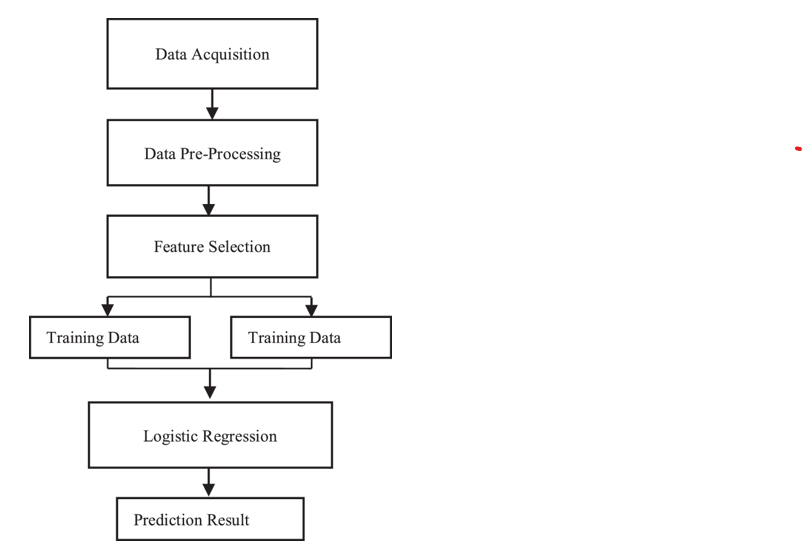

**2.1 Data acquisition**

Dataset heart disease ini merupakan data sekunder yang diambil dari [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). Dataset ini terdiri dari 14 features dan 1025 records.

**2.2 Data pre-processing**

Pertama, dataset ini penulis load kemudian data dibersihkan. Pada proses pengecekan missing value pada semua records, dataset ini memiliki informasi yang komplit. Pada proses pengecekan data duplikat, terdapat duplikat pada data dan selanjutnya penulis akan drop duplikat pada dataset ini. Selain itu, beberapa feature memiliki beberapa outlier.

**2.3 Feature Selection**

Dataset ini memiliki atribut yang berisi informasi medis yang penting untuk memprediksi heart disease. Penulis, akan menggunakan 13 feature ini untuk analisis kedepannya.

**2.4 Splitting dataset**

Data dibagi kedalam data train dan test. Data Train digunakan agar algoritma dapat belajar dan kemudian dapat mengecek akurasi dari model pada data test. Penulis prefer untuk menggunakan *Split percentage of training and test set* : 70% training set dan 30% test set.

**2.5 Classification**

Penulis akan mencoba tiga model yaitu, **Logistic Regression, Decision Tree, dan Support Vector Machine** untuk memprediksi pasien yang terdiagnosis heart disease atau tidak.

**2.6 Result and Discussion**

Hasil pemodelan dapat diperoleh hasil prediksi yang kemudian dapat ditunjukkan **classification report, precision, recall, f1-score, dan accuracy** dari masing-masing calssifier pada dataset ini. Selain itu, **Kurva ROC (Receiver Operator Characteristics)** dapat digunakan untuk penyelidikan lebih lanjut ke dalam model. Kinerja model dapat divisualisasikan oleh ROC Curve dan tradeoff antara TPR (True Positive Rate) dan FPR (False Positive Rate). Ini berkisar dari 0 hingga 1 dan area di bawahnya menandakan kemampuan membedakan kelas model ML. Kurva ROC mendekati satu yang lebih mampu mengklasifikasikan.

Tentu saja hasil analisis ini perlu dikomunikasikan kepada pemangku kepentingan dan orang yang expert dibidang kesehatan agar prediksi yang dihasilkan dapat digunakan dan bermanfaat.




---
# 3. Check the quality of the dataset (missing value, duplicates, outliers, data imbalance)
---

In [ ]:
#import library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import altair as alt

#splitting dataset
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Cross Validation
from sklearn.model_selection import StratifiedKFold

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#load data
heart = pd.read_csv("/content/drive/MyDrive/Startup Campus/Tugas 2/heart_data.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#info data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### **3.1 Missing Value**

In [ ]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

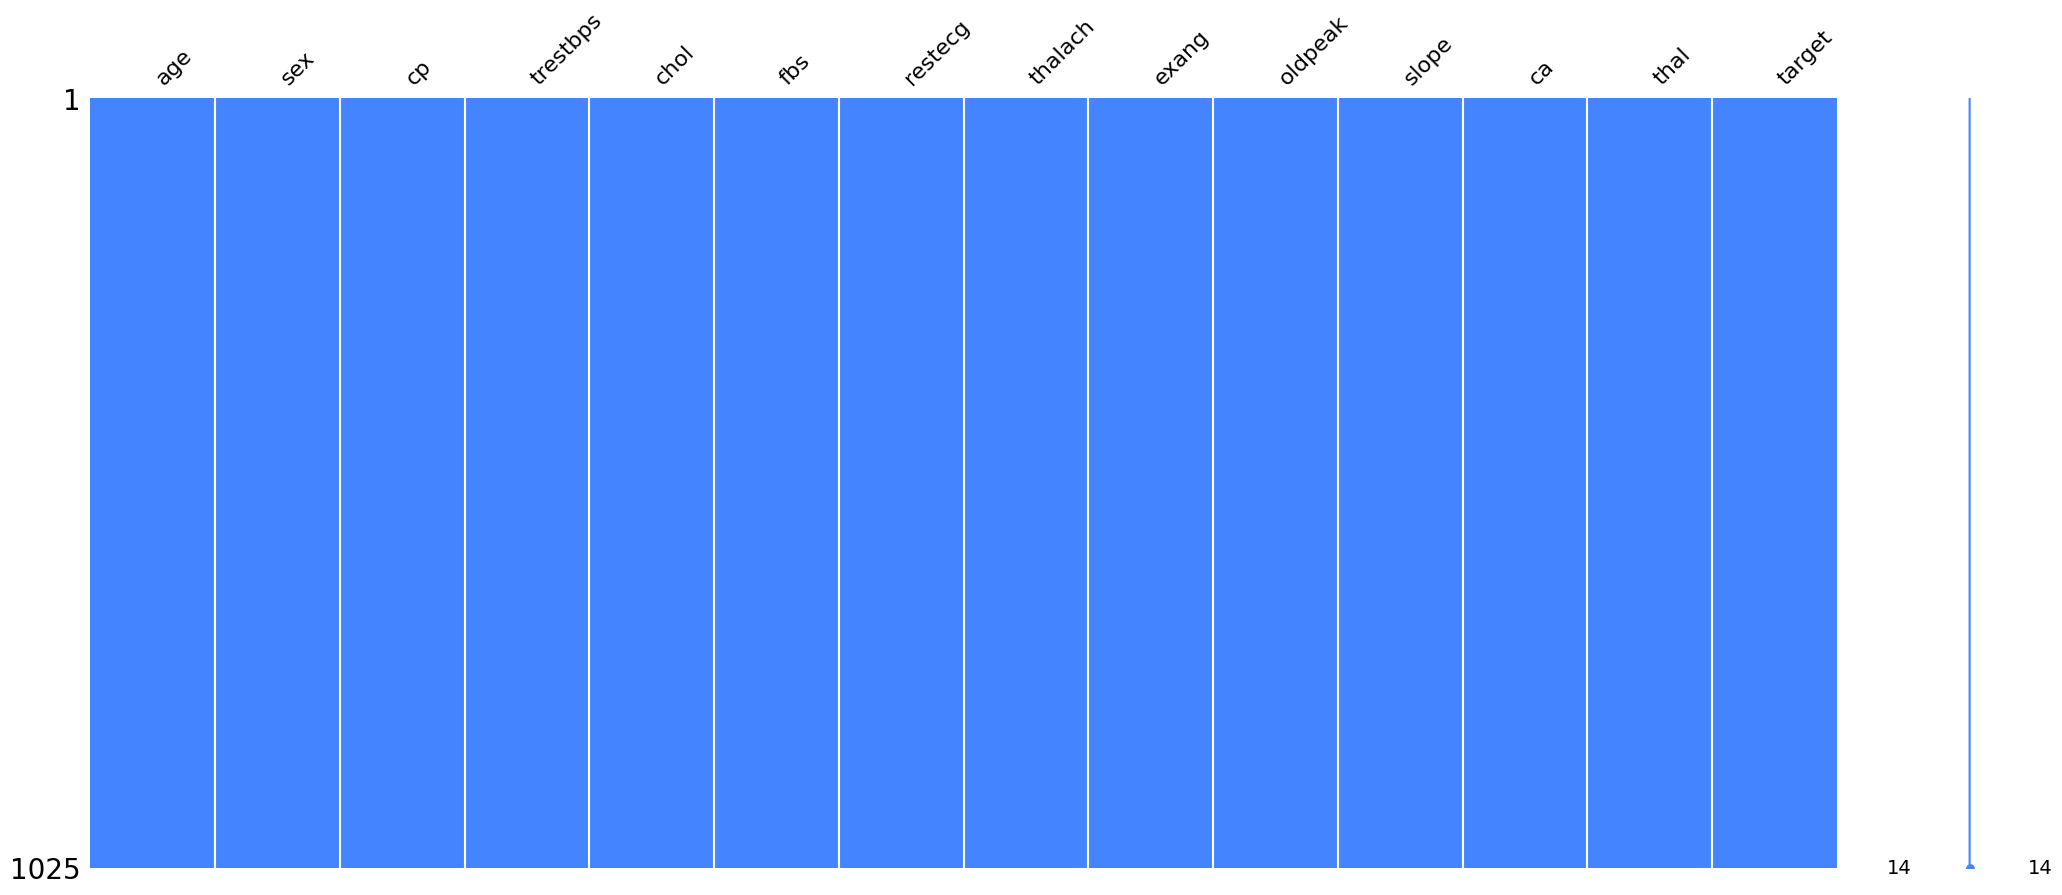

<Figure size 1500x900 with 0 Axes>

In [ ]:
msno.matrix(heart, color=(0.27, 0.52, 1.0))
plt.figure(figsize=(15,9))
plt.show()

Melalui visualisasi diatas, terlihat bahwa dataset ini tidak memiliki missing value.

### **3.2 Duplicates**

In [ ]:
 heart.duplicated().sum()

723

#### **3.2.1 Duplicate Handling**
Terdapat 723 data duplikat. Penulis akan drop data duplikat ini.

In [ ]:
heart = heart.drop_duplicates()

In [ ]:
# info data setelah duplikat di drop
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### 3.3 **Outliers**
- Pengecekan outlier ini dilakukan dengan menggunakan formula:
  - Outlier bawah jika dantum < Q1 - 1.5 x IQR atau outlier atas jika dantum > Q3 + 1.5 x IQR.
- Selanjutnya, penulis akan mengecek apakah terdapat ekstrem value pada atribut ini dengan menggunakan formula:
  - ekstreem value bawah jika dantum < Q1 - 3 x IQR atau ekstrem value atas jika dantum > Q3 + 3 x IQR.



#### Pengecekan Outlier

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']
outliers = find_outliers_IQR(heart[num])
outliers.notnull().sum()

age          0
trestbps     9
chol         5
thalach      1
oldpeak      5
ca          24
dtype: int64

#### Pengecekan Ekstrem Value

In [ ]:
def find_ekstrem_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   ekstrem= df[((df<(q1-3*IQR)) | (df>(q3+3*IQR)))]
   return ekstrem

In [ ]:
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']
ekstrem = find_ekstrem_IQR(heart[num])
ekstrem.notnull().sum()

age         0
trestbps    0
chol        1
thalach     0
oldpeak     0
ca          0
dtype: int64

#### **Pengecekan Outlier dengan Boxplot**

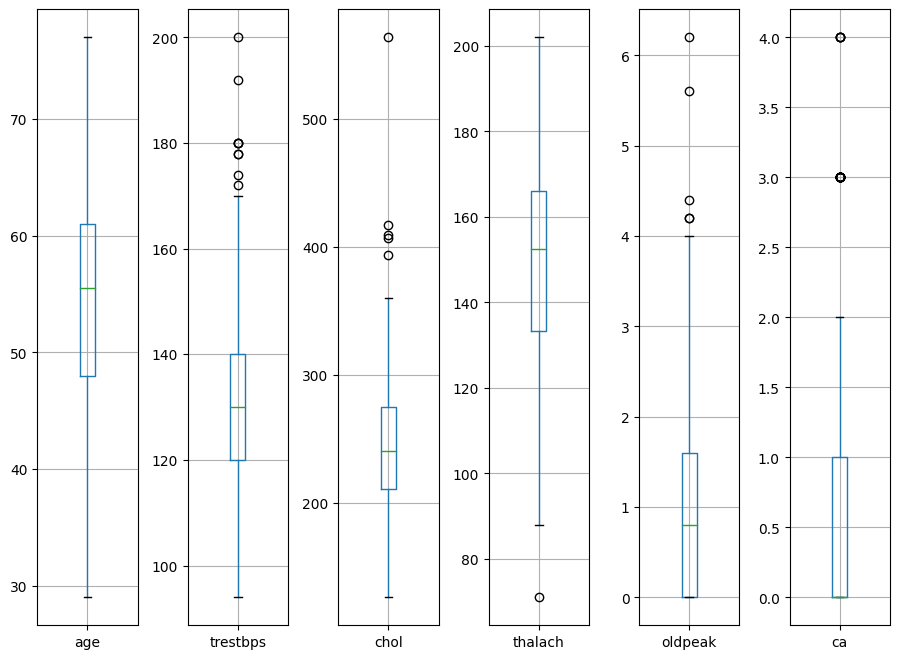

In [ ]:
# 6 subplots in one row
fig, ax = plt.subplots(1, 6, figsize=(11, 8))

# draw boxplots - for one column in each subplot
heart.boxplot('age', ax=ax[0])
heart.boxplot('trestbps', ax=ax[1])
heart.boxplot('chol', ax=ax[2])
heart.boxplot('thalach', ax=ax[3])
heart.boxplot('oldpeak', ax=ax[4])
heart.boxplot('ca', ax=ax[5])

plt.subplots_adjust(wspace=0.5)

plt.show()

Pada Boxplot diatas, outlier divisualisasikan dengan lingkaran kecil.

Pengecekan Outlier ini dilakukan pada data yang bertipe interval atau rasio, yaitu terhadap **variabel age, trestbps, chol, thalach, oldppeak, dan ca**.
- Pada variabel age tidak terdapat data outlier
- Pada variabel trestbps terdapat outlier sebanyak 9
- Pada variabel chol terdapat outlier sebanyak 5
- Pada variabel thalach terdapat outlier sebanyak 1
- Pada variabel oldpeak terdapat outlier sebanyak 5
- Pada variabel ca terdapat outlier sebanyak 24

Selanjutnya, setelah dilakukan pengecekan ekstrem value, terdapat satu ekstrem value pada variabel chol. Berdasarkan jurnal dengan study case dan dataset yang sama, penulis akan tetap membiarkan data outlier ini digunakan pada proses selanjutnya.


### **3.4 Data Imbalance**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('target:N', title='Heart Disease (0:tidak, 1:ya)'),
        y=alt.Y('count(target):Q', title ='Count of target'),
        tooltip='count(target):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Heart Disease Status')
 )

alt.Chart(...)

Barplot diatas menunjukkan jumlah target, dengan jumlah kelas 0 (pasien yang tidak heart disease) sebanyak 138 dan jumlah kelas 1 (pasien yang heart disease) sebanyak 164. Berdasarkan barplot ini, variabel target memiliki kelas yang cukup balance.



# 4. Check the descriptive Statistics of the dataset (mean, distribution, etc)

### **4.1 Mean, Distribusi, etc**

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4.2 Insight

**Fitur Numerik**
* `age` : <br>
Pasien memiliki rata-rata umur sebesar 54.42 tahun dengan standar deviasi sebesar 9.05 tahun yang artinya umur pasien memusat di sekitar 54.42 tahun dengan penyebaran sebesar 9.05 tahun. Pasien memiliki umur tertinggi 77 tahun dan terendah 29 tahun.
* `trestbps` : <br>
Pasien memiliki rata-rata resting blood pressure sebesar 131.6 mmHg dengan standar deviasi sebesar 17.56 mmHg yang artinya resting blood pressure pasien memusat di sekitar 131.60 mmHg dengan penyebaran sebesar 17.56 mmHg. Pasien memiliki resting blood pressure tertinggi sebesar 200 mmHg dan terendah sebesar 94 mmHg.
* `chol` : <br>
Pasien memiliki rata-rata serum cholesterol sebesar 246.5 mg/dl dengan standar deviasi sebesar 51.75 mg/dl yang artinya serum cholesterol pasien memusat di sekitar 246.5 mg/dl dengan penyebaran sebesar 51.75 mg/dl. Pasien memiliki serum cholesterol tertinggi sebesar 564 mg/dl dan terendah sebesar 126 mg/dl.
* `thalach` : <br>
Pasien memiliki rata-rata maximum heart rate sebesar 149.57 dengan standar deviasi sebesar 22.9 yang artinya rata-rata maximum heart rate pasien memusat di sekitar 149.57 dengan penyebaran sebesar 22.9. Pasien memiliki rata-rata maximum heart rate tertinggi sebesar 202 dan terendah sebesar 71.
* `oldpeak` : <br>
Pasien memiliki rata-rata ST depression induced by exercise relative to res sebesar 1.04 dengan standar deviasi sebesar 1.16 yang artinya data memusat di sekitar 1.04 dengan penyebaran sebesar 1.16. Pasien memiliki ST depression induced by exercise relative to res tertinggi sebesar 6.2 dan ada juga pasien yang tidak memiliki T depression induced by exercise relative to res.
* `ca` : <br>
Pasien memiliki rata-rata jumlah dari major vessels colored by fluoroscopy sebesar 0.71 dengan standar deviasi sekitar 1 yang artinya data memusat di sekitar 0.71 dengan penyebaran di sekitar 1. Pasien memiliki jumlah dari major vessels colored by fluoroscopy tertinggi sejumlah 4 dan ada juga pasien yang tidak memiliki jumlah dari major vessels colored by fluoroscopy.

**Distribution Fitur Numerik**

Sekilas, secara deskriptif variabel numerik memiliki bentuk distribusi:
* `age` : Informasi usia pasien pada dataset ini, secara keseluruhan, pasien memiliki rata-rata umur 54.4 tahun yang lebih kecil dari mediannya 55.5 tahun (cenderung mendekati normal).
* `trestbps` : Secara keseluruhan, Pasien memiliki rata-rata resting blood pressure sebesar 131.6 mmHg yang lebih besar dari mediannya 130 mmHg dimana perbedaan ini tidaklah signifikan (Mendekati normal).
* `chol` : Secara keseluruhan, Pasien memiliki rata-rata serum cholesterol sebesar 246.5 md/dl yang lebih besar dari mediannya 240.5 mg/dl (berdistribusi menceng kanan).
* `thalach` : Secara keseluruhan, Pasien memiliki rata-rata maximum heart rate sebesar 149.57 dimana lebih kecil dari mediannya 152.5 (cenderung berdistribusi menceng kiri).
* `oldpeak` : Secara keseluruhan, Pasien memiliki rata-rata ST depression induced by exercise relative to res sebesar 1.04 yang lebih besar dari mediannya 0.8 (berdistribusi menceng kanan).
* `ca` : Secara keseluruhan, Pasien memiliki rata-rata jumlah dari major vessels colored by fluoroscopy sebesar 0.71 yang lebih besar dari median, yaitu pasien yang tidak ada major vessels colored by fluoroscopy (cenderung menceng kanan).


Lebih jelasnya, distribusi fitur numerik dapat dilihat melalui visualisasi data seperti histogram dapat dilihat pada poin 6 dibawah.


**Fitur Kategorik**

Dataset ini memiliki fitur kategorik, yaitu `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, dan `thal` dimana dengan menggunakan count plot akan dilihat distribusi dan karakteristik dari setiap fitur dapat dilihat pada poin 6 dibawah.



---
# 5. Check the correlation between feature
---

Korelasi antar fitur ditunjukkan dengan metode spearman. Penulis memilih metode ini, karena spearman correlation dapat melihat hubungan antar variabel baik linear ataupun tidak linear.

In [ ]:
heart.corr(method="spearman")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.096028,-0.082679,0.289705,0.188903,0.112177,-0.128480,-0.393453,0.086392,0.263625,-0.179514,0.354919,0.084358,-0.234845
sex,-0.096028,1.000000,-0.064739,-0.054310,-0.148622,0.046022,-0.050582,-0.043401,0.143460,0.103789,-0.027434,0.115811,0.252738,-0.283609
cp,-0.082679,-0.064739,1.000000,0.033328,-0.087005,0.091306,0.062848,0.321549,-0.417321,-0.158693,0.156819,-0.224656,-0.206536,0.459589
trestbps,0.289705,-0.054310,0.033328,1.000000,0.130210,0.153161,-0.127945,-0.042699,0.054199,0.156807,-0.088727,0.087322,0.060770,-0.123478
chol,0.188903,-0.148622,-0.087005,0.130210,1.000000,0.016267,-0.157972,-0.040367,0.088442,0.039565,-0.007404,0.123201,0.080810,-0.117006
fbs,0.112177,0.046022,0.091306,0.153161,0.016267,1.000000,-0.080340,-0.012588,0.024729,0.026710,-0.044529,0.138029,-0.007555,-0.026826
restecg,-0.128480,-0.050582,0.062848,-0.127945,-0.157972,-0.080340,1.000000,0.084426,-0.075427,-0.074073,0.110853,-0.104653,-0.009045,0.146223
thalach,-0.393453,-0.043401,0.321549,-0.042699,-0.040367,-0.012588,0.084426,1.000000,-0.399534,-0.430495,0.434711,-0.267546,-0.158526,0.426368
exang,0.086392,0.143460,-0.417321,0.054199,0.088442,0.024729,-0.075427,-0.399534,1.000000,0.295487,-0.272726,0.167622,0.246126,-0.435601
oldpeak,0.263625,0.103789,-0.158693,0.156807,0.039565,0.026710,-0.074073,-0.430495,0.295487,1.000000,-0.593147,0.234546,0.253358,-0.419631


Pada output diatas dapat dilihat korelasi antar dua fitur pada seluruh dataset ini. Selanjutnya Penulis akan melihat korelasi fitur terhadap variabel target.

In [ ]:
heart.corr(method="spearman")['target'].sort_values(ascending=False)

target      1.000000
cp          0.459589
thalach     0.426368
slope       0.369391
restecg     0.146223
fbs        -0.026826
chol       -0.117006
trestbps   -0.123478
age        -0.234845
sex        -0.283609
thal       -0.402382
oldpeak    -0.419631
exang      -0.435601
ca         -0.466976
Name: target, dtype: float64

Terlihat bahwa fitur-fitur yang memiliki korelasi yang cukup kuat dan positif terhadap target adalah cp, thalach, slope. Terlihat pula bahwa fitur-fitur yang memiliki korelasi yang cukup kuat dan negatif terhadap target adalah ca, exang, oldpeak, dan thal.


---
# 6. Visualize points 4 and 5
---

### **6.1 Age**


In [ ]:
# Histogram Age
base = alt.Chart(heart)

bar = base.mark_bar().encode(
    x=alt.X('age:Q', bin=True, title='Age'),
    y=alt.Y('count()', title='Count'),
    tooltip=['age']
)

rule = base.mark_rule(color='red').encode(
    x='mean(age):Q',
    tooltip=['mean(age)'],
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

Histogram diatas menunjukkan distribusi variabel umur pasien dengan garis merah merupakan rata-rata umur pasien. Kebanyakan pasien pada dataset ini memiliki umur sekitar 50 - 60 tahun. Secara keseluruhan pasien memiliki rata-rata umur 54.42 tahun. Terlihat juga bahwa umur pasien cenderung berdistribusi mendekati normal.

### **6.2 Sex**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('sex:N', title='Sex (0:female, 1:male)'),
        y=alt.Y('count(sex):Q', title ='Count of Sex'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(sex):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Sex')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Sex dengan kategori 0 (female) dan 1 (male).
- Terlihat bahwa pasien pada dataset ini kebanyakan berjenis kelamin laki-laki. Dengan perbandingan untuk pasien berjenis kelamin laki-laki dengan perempuan sekitar 2:1.
- Selanjutnya, jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa :
  - Dari 96 pasien yang berjenis kelamin perempuan, terdapat 72 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sebesar 3:1 untuk jenis kelamin perempuan.
  - Dari 206 pasien yang berjenis kelamin laki-laki, terdapat 92 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 1:2 untuk jenis kelamin laki-laki.


### **6.3 cp (Chest Pain Type)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('cp:N', title='Chest-pain type'),
        y=alt.Y('count(cp):Q', title ='Count'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(cp):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Chest-pain type')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel cp (Chest-pain type), dengan kategori 0(typical angina), 1(atypical angina), 2(non-anginal pain), dan 3(asymptotic).
- Terlihat bahwa pasien pada dataset ini kebanyakan memiliki jenis chest pain typical angina dan sangat jarang pasien memiliki chest pain asymptotic.
- Selanjutnya, jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa
  - Terdapat 143 pasien dengan jenis chest pain typical angina. Dari 143 pasien tersebut 39 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 1:3 untuk jenis chest pain typical angina.
  - Terdapat 50 pasien dengan jenis chest pain atypical angina. Dari 50 pasien tersebut 41 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 5:1 untuk jenis chest pain atypical angina.
  - Terdapat 86 pasien dengan jenis chest pain non-anginal pain. Dari 86 pasien tersebut 68 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 4:1 untuk jenis chest pain non-anginal pain.
  - Terdapat 23 pasien dengan jenis chest pain asymptotic. Dari 23 pasien tersebut 16 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sebesar 2:1 untuk jenis chest pain asymptotic.

### **6.4 trestbps (Resting Blood Pressure)**

In [ ]:
base = alt.Chart(heart)

bar = base.mark_bar().encode(
    x=alt.X('trestbps:Q', bin=True, title='Resting Blood Pressure'),
    y=alt.Y('count()', title='Count'),
    tooltip=['trestbps']
)

rule = base.mark_rule(color='red').encode(
    x='mean(trestbps):Q',
    tooltip=['mean(trestbps)'],
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

Kebanyakan pasien memiliki resting blood pressure sekitar 120 - 160 mmHg. Secara keseluruhan pasien memiliki rata-rata resting blood pressure sebesar 131.6 mmHg. Terlihat juga, variabel resting blood pressure mendekati distribusi normal.

### **6.5 Chol (Serum Cholesterol)**

In [ ]:
base = alt.Chart(heart)

bar = base.mark_bar().encode(
    x=alt.X('chol:Q', bin=True, title='Serum Cholesterol'),
    y=alt.Y('count()', title='Count'),
    tooltip=['chol']
)

rule = base.mark_rule(color='red').encode(
    x='mean(chol):Q',
    tooltip=['mean(chol)'],
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

Kebanyakan pasien memiliki serum cholesterol sekitar 150 - 250 mg/dl dan secara keseluruhan pasien memiliki rata-rata serum cholesterol sebesar 246.5 mg/dl. Selain itu, beberapa pasien memiliki serum cholesterol yang tinggi, yaitu berkisar 550-600 mg/dl. Bentuk distribusi variabel ini cenderung menceng kanan.

### **6.6 fbs (Fasting Blood Sugar)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('fbs:N', title='Fasting Blood Sugar (0:<=120 mg/dl, 1:>120 mg/dl) '),
        y=alt.Y('count(fbs):Q', title ='Count of fbs'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(fbs):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Fasting Blood Sugar')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Fasting Blood Sugar dengan kategori 0 (<= 120 mg/dl) dan 1 (>120 mg/dl).

- Terlihat bahwa pasien pada dataset ini kebanyakan memiliki fasting blood sugar <= 120 mg/dl. Perbandingan pasien yang memiliki fasting blood sugar <= 120 mg/dl dengan pasien yang memiliki fasting blood sugar >120 mg/dl sekitar 6:1.
- Selanjutnya, jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa :
  - Dari 257 pasien yang memiliki fasting blood sugar <= 120 mg/dl, terdapat 141 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease hampir sama.
  - Dari 45 pasien yang memiliki fasting blood sugar >120 mg/dl, terdapat 23 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease hampir sama.


### **6.7 Restecg (resting electrocardiographic results)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('restecg:N', title='restecg'),
        y=alt.Y('count(restecg):Q', title ='Count of restecg'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(restecg):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Resting Electrocardiographic Results')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Resting Electrocardiographic Results dengan kategori 0 (normal), 1 (having ST-T wave abnormality), 2(left ventricular hyperthrophy).
- Terlihat bahwa pasien pada dataset ini memiliki hasil Resting Electrocardiographic normal atau memiliki ST-T wave abnormality. Selain itu, sangat jarang pasien memiliki hasil Resting Electrocardiographic left ventricular hyperthrophy.
- Selanjutnya, jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa :
  - Dari 147 pasien yang memiliki hasil Resting Electrocardiographic normal, terdapat 68 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease hampir sama.
  - Dari 151 pasien yyang memiliki hasil Resting Electrocardiographic memiliki gelombang ST-T abnormality, terdapat 95 pasien yang terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 2:1.
  - Dari 4 pasien yang memiliki hasil Resting Electrocardiographic left ventricular hyperthrophy, terdapat 1 pasien yang terkena heart disease.

### **6.8 thalach (Max Heart Rate Achieved)**

In [ ]:
base = alt.Chart(heart)

bar = base.mark_bar().encode(
    x=alt.X('thalach:Q', bin=True, title='Max Heart Rate Achieved'),
    y=alt.Y('count()', title='Count'),
    tooltip=['thalach']
)

rule = base.mark_rule(color='red').encode(
    x='mean(thalach):Q',
    tooltip=['mean(thalach)'],
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

Histogram diatas menunjukkan distribusi variabel Max Heart Rate Achieved dengan garis merah merupakan rata-rata. Kebanyakan pasien pada dataset ini memiliki Max Heart Rate Achieved sekitar 160-180. Secara keseluruhan pasien memiliki rata-rata Max Heart Rate Achieved 149.6. Terlihat juga bahwa variabel ini cenderung berdistribusi menceng kiri.

### **6.9 exang (Angina included by exercise)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('exang:N', title='Angina included by exercise (0:no. 1:yes)'),
        y=alt.Y('count(exang):Q', title ='Count of exang'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(exang):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Angina included by exercise')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Angina included by exercise dengan kategori 0 (no) dan 1 (yes).

- Terlihat bahwa pasien pada dataset ini kebanyakan tidak melakukan angina exercise. Dengan perbandingan pasien yang angina included by exercise ya dan tidak sebesar 1:2.
- Jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa
  - Terdapat 203 pasien yang tidak angina exercise. Dari 203 pasien tersebut 141 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sekitar 2:1.
  - Terdapat 99 pasien dengan angina exercise. Dari 99 pasien tersebut 23 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sebesar 1:3.


### **6.10 oldpeak (ST depression induced by exercise relative to rest)**

In [ ]:
base = alt.Chart(heart)

bar = base.mark_bar().encode(
    x=alt.X('oldpeak:Q', bin=True, title='ST depression induced by exercise relative to rest'),
    y=alt.Y('count()', title='Count'),
    tooltip=['oldpeak']
)

rule = base.mark_rule(color='red').encode(
    x='mean(oldpeak):Q',
    tooltip=['mean(oldpeak)'],
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

Kebanyakan pasien memiliki ST depression induced by exercise relative to rest kurang dari 1. Kebanyakan pula tidak memiliki ST depression induced by exercise relative to rest. Secara keseluruhan pasien memiliki rata-rata ST depression induced by exercise relative to rest sebesar 1.04. Selain itu, beberapa pasien memiliki ST depression induced by exercise relative to rest yang tinggi, yaitu berkisar 6-7. Bentuk distribusi variabel ini cenderung menceng kanan.

### **6.11 slope (Peak exercise ST segment)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('slope:N', title='Peak exercise ST segment (0:upsloping, 1:flat, 2:downsloping)'),
        y=alt.Y('count(slope):Q', title ='Count of slope'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(slope):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Peak exercise ST segment')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Peak exercise ST segment dengan kategori 0 (upsloping), 1 (flat), dan 2 (downsloping).

- Terlihat bahwa pasien pada dataset ini kebanyakan dengan peak exercise ST segment flat atau downsloping. Selain itu, jarang pasien dengan peak exercise ST segment upsloping.
- Jika dikategorikan berdasarkan varibel target dengan 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease) dapat dilihat bahwa
  - Terdapat 21 pasien dengan peak exercise ST segment upsloping. Dari 21 pasien tersebut 9 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease hampir sama.
  - Terdapat 140 pasien dengan peak exercise ST segment flat. Dari 140 pasien tersebut 49 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sebesar 1:2.
  - Terdapat 141 pasien dengan peak exercise ST segment downsloping. Dari 141 pasien tersebut 106 diantaranya terkena heart disease. Hal ini berarti perbandingan status disease dan non disease sebesar 3:1.

### **6.12 ca (Number of major vessels colored by fluoroscopy)**
Number of major vessels colored by fluoroscopy merupakan data numerik dengan rentang 0-4. Rentang tersebut cukup kecil sehingga visualisasi dengan barplot tidak masalah.

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('ca:N', title='Number of major vessels colored by fluoroscopy'),
        y=alt.Y('count(ca):Q', title ='Count of ca'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(ca):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Number of major vessels colored by fluoroscopy')
 )

alt.Chart(...)

Kebanyakan pasien tidak memiliki major vessels colored by fluroscopy. Kebanyakan pula mereka yang tidak memiliki major vessels colored by fluroscopy terkena heart disease. Selain itu, sangat jarang pasien memiliki jumlah major vessels colored by fluroscopy sebanyak 4.

### **6.13 thal (thalassemia)**

In [ ]:
(alt.
    Chart(heart).
    mark_bar().
    encode(
        x=alt.X('thal:N', title='Thalassemia'),
        y=alt.Y('count(thal):Q', title ='Count of thal'),
        color=alt.Color('target:N', title='heart disease'),
        tooltip='count(thal):Q'
        ).
    properties(height=300, width=400, title = 'Barplot of Thalassemia')
 )

alt.Chart(...)

Barplot diatas menunjukkan distribusi dari variabel Thalasemia. Terlihat bahwa pasien pada dataset ini kebanyakan memiliki jenis Thalasemia kategori 2. Selain itu, jarang pasien yang memiliki jenis thalasemia kategori 0. Selanjutnya, jika dilihat dari variabel target dimana 0 (pasien tidak terkena heart disease) dan 1 (pasien terkena heart disease), kebanyakan pasien dengan Thalasemia jenis 2 memiliki status heart disease.


### **6.14 Correlation**

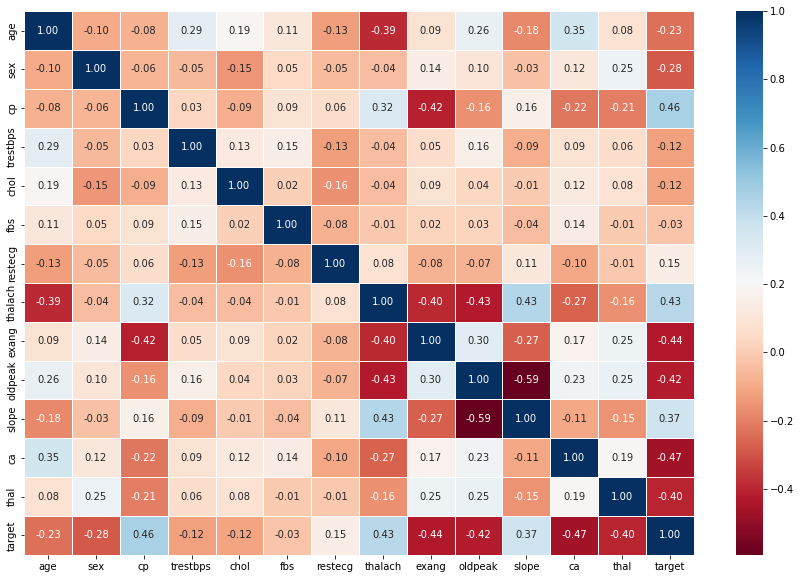

In [ ]:
corr_matrix = heart.corr(method="spearman")
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap='RdBu',
                 fmt=".2f")

Terlihat bahwa fitur-fitur yang memiliki korelasi yang cukup kuat dan positif terhadap target adalah cp, thalach, slope. Terlihat pula bahwa fitur-fitur yang memiliki korelasi yang cukup kuat dan negatif terhadap target adalah ca, exang, oldpeak, dan thal.

### **6.15 Pairplot**

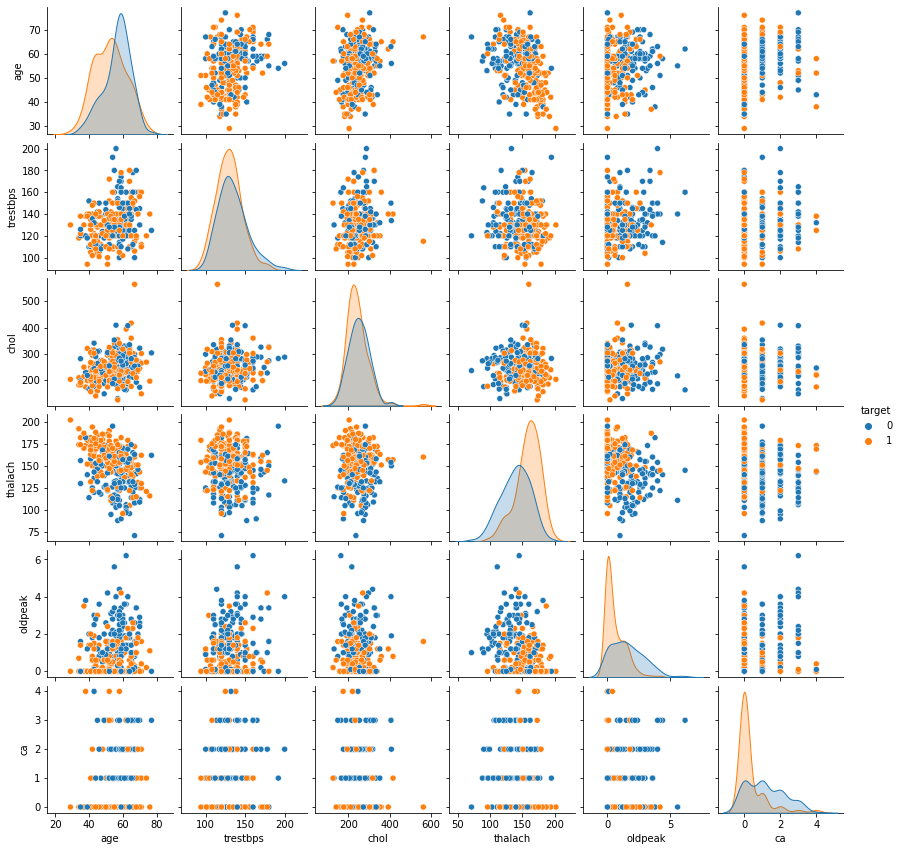

In [ ]:
sns.pairplot(data=heart[['age','trestbps','chol','thalach', 'oldpeak', 'ca','target']], hue='target',
             diag_kind="kde", height=2)
plt.show()

Output diatas merupakan pairplot, dimana sumbu non diagonal menunjukkan Scaterplot. Sedangkan sumbu diagonal menunjukkan distribusi dari masing-masing fitur.
- Untuk variabel Age, terlihat bahwa baik pasien yang terkena penyakit jantung dan tidak terkena penyakit jantung cenderung memiliki penyebaran umur yang relatif sama.
- Untuk variabel trestbps, pada dataset ini terlihat bahwa pasien yang tidak terkena penyakit jantung sedikit cenderung memiliki resting blood pressure yang lebih besar daripada pasien yang terkena penyakit jantung.
- Untuk variabel chol, pada dataset ini terlihat bahwa pasien yang terkena penyakit jantung cenderung memiliki serum cholesterol dalam mg/dl yang lebih besar daripada pasien yang tidak terkena penyakit jantung.
- Untuk variabel thalac, pada dataset ini terlihat bahwa pasien yang terkena penyakit jantung cenderung memiliki Maximum Heart Rate Achieved yang lebih besar daripada pasien yang tidak terkena penyakit jantung.
- Untuk variabel oldpeak, pada dataset ini terlihat bahwa pasien yang tidak terkena penyakit jantung sedikit cenderung memiliki ST depression induced by exercise relative to rest yang lebih besar daripada pasien yang terkena penyakit jantung.
- Untuk variabel ca, pada dataset ini terlihat bahwa baik pasien yang terkena penyakit jantung dan tidak terkena penyakit jantung cenderung memiliki jumlah major vessels colored by fluroscopy yang relatif sama.



---
# 7. Define possible feature engineering through encoding
---


Dataset ini terdiri dari fitur numerik dan kategorik dengan tipe data nominal, maka variabel kategorik lebih cocok jika dilakukan **one hot encoding**. Variabel kategorik pada dataset ini adalah sex, cp, fbs, restecg, exang, slope, dan thal. Karena sex, fbs, dan exang sudah bernilai dua kategori 0 dan 1, tidak akan berpengaruh signifikan jika ketiga variabel ini tidak dilakukan one hot encoding.

### **7.1 One Hot Encoding**

In [ ]:
categorical_val = ['cp','restecg','slope','thal']
heart_dmy = pd.get_dummies(heart, columns = categorical_val)
heart_dmy.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


### Splitting dataset

In [ ]:
X = heart_dmy.drop(['target'], axis = 1)
y = heart_dmy['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

### Feature Scaling

In [ ]:
num = ['age','trestbps','chol','thalach','oldpeak','ca']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train[num] = sc.fit_transform(X_train[num])
X_test[num] = sc.transform(X_test[num])



---
#**Tugas 3**
---




# **Instruksi Tugas 3**
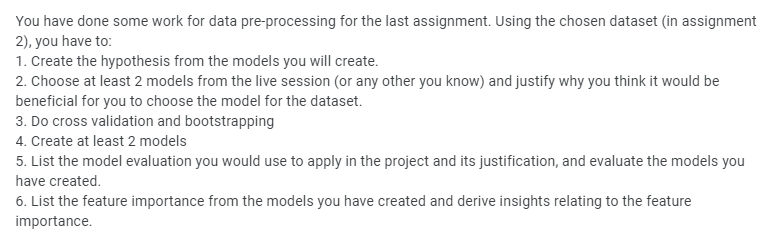



---
# 1. Create the hypothesis from the models you will create
---





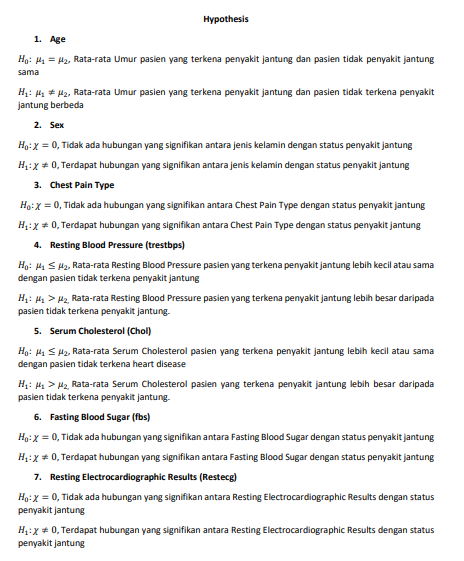

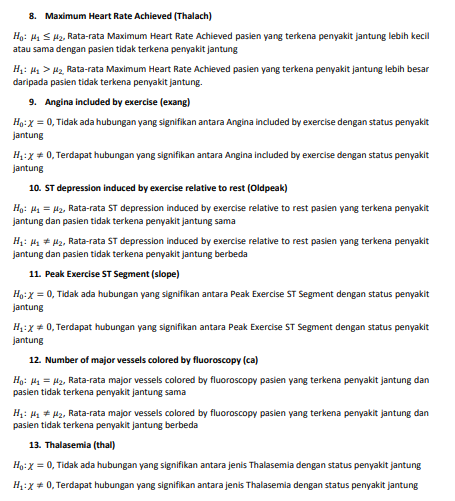



---
# 2. Choose at least 2 models from the live session (or any other you know) and justify why you think it would be beneficial for you to choose the model for the dataset.
---



Penulis akan mencoba tiga model yaitu, **Logistic Regression, Decision Tree, dan Support Vector Machine** untuk memprediksi pasien yang terdiagnosis heart disease atau tidak. Penulis tertarik untuk melakukan pemodelan klasifikasi dengan **Logistic Regression dan Decision Tree** karena model ini mudah diinterpretasikan. Selanjutnya, penulis tertarik untuk melakukan pemodelan klasifikasi dengan **Support Vector Machine** karena algoritma ini menjadi salah satu algoritma yang sudah sering digunakan untuk menganalisis dataset medis.

**1. Logistic Regression**

Salah satu Algoritma Klasifikasi Machine Learning yang simple dan terbaik adalah Logistic Regression(LR). LR adalah supervised learning, algoritma binary classification telah banyak digunakan di banyak aplikasi. Algoritma ini bekerja pada discrete atau binary categorical variable 0 atau 1. Sigmoid function ini digunakan sebagai cost function. Fungsi sigmoid ini memetakan nilai real yang diprediksi kedalam nilai probabilistik antara 0 dan 1.

**Logistik Sigmoid Function:**
$P(x) = 1/(1+\mathrm{e}^{-x})$

Dimana, $P(x)$ adalah probabilitas fungsi estimasi dengan nilai antara 0 dan 1, $x$ adalah input kedalam fungsi probabilitas (algorithm's prediction value), dan konstanta matematika $\mathrm{e}$ adalah bilangan euler.

**2. Decision Tree Classifier**

Salah satu algoritma klasifikasi Machine Learning yang menggunakan serangkaian rules untuk membuat keputusan. Algoritma ini memiliki beberapa keunggulan seperti, Interpretability (hasil pemodelan mudah diinterpretasikan), No preprocessing required, Data robustness (Algoritma dapat menghandle semua tipe data dengan baik).

Pada algoritma ini terdapat ukuran seleksi atribut. Ukuran ini disebut juga sebagai aturan pemisahan (splitting rules), karena aturan ini menentukan bagaimana decision tree "dibentuk". Terdapat beberapa aturan pemisahan dan tipe decision tree berdasarkan aturan pemisahannya yang cukup
sering digunakan, diantaranya adalah sebagai berikut.
1. Information Gain, digunakan di decision tree ID3 (Quinlan, 1983).
2. Gain Ratio, digunakan di decision tree C4.5 (Quinlan, 1992).
3. Gini Index, digunakan di decision tree CART (Breiman et al, 1984).

**3. Support Vector Machine Classifier**

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi. Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.
SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. Dalam 2-D fungsi yang digunakan untuk klasifikasi antar kelas disebut sebagai line whereas, fungsi yang digunakan untuk klasifikasi antas kelas dalam 3-D disebut plane similarly, sedangkan fungsi yang digunakan untuk klasifikasi di dalam ruang kelas dimensi yang lebih tinggi di sebut hyperplane.













---
# 3. Do cross validation and bootstrapping & 4. Create at least 2 models
---



Untuk menilai performa model, seorang peneliti dapat mengumpulkan lebih banyak observasi dan menguji model pada data baru. Tetapi tergantung pada proyeknya, mungkin mahal atau tidak mungkin mendapatkan pengamatan baru. Dalam hal ini, seorang peneliti dapat menggunakan resampling dengan kumpulan data yang sudah dimiliki. Dua metode resampling yang paling umum digunakan adalah cross validation dan bootstrapping.

1. **Bootstrap** adalah metode untuk mensimulasikan pengambilan sampel baru dari kumpulan data dengan pengembalian agar pengamatan tidak habis. Dengan sampel bootstrap baru, bootstrap mengevaluasi akurasi statistik sampel pilihan peneliti dengan menghitung estimasi, kesalahan standar, dan interval kepercayaannya.
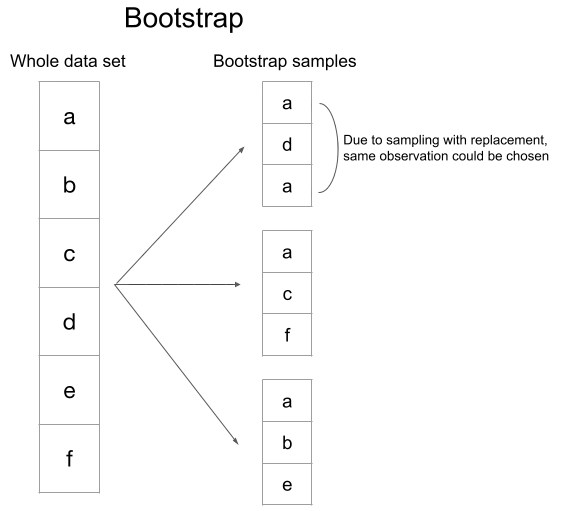

2. **Cross Validation(CV)**

Dengan Cross Validation, peneliti dapat melakukan penilaian model dengan memperkirakan kesalahan pengujian atau pemilihan model dengan memilih tingkat fleksibilitas berdasarkan kesalahan pengujian masing-masing model. Ide dasar dari CV adalah
  1. Membagi dataset kedalam training dan validation set.
  2. Menggunakan training set untuk fit sebuah model
  3. Mengevaluasi model performance dengan validation set.

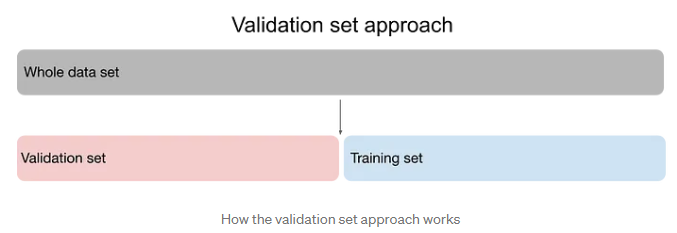

**K-fold cross-validation**

Dengan CV k-fold, pertama-tama peneliti memilih nilai k. Kemudian, membagi kumpulan data menjadi k kumpulan. Set pertama menjadi validation set dan sisanya menjadi training set. Setelah menyesuaikan dan mengevaluasi model, pindah ke set kedua dan ulangi prosesnya. CV k-fold mengulang k kali dan rata-rata estimasi kesalahan uji k menjadi estimasi CV k-fold.
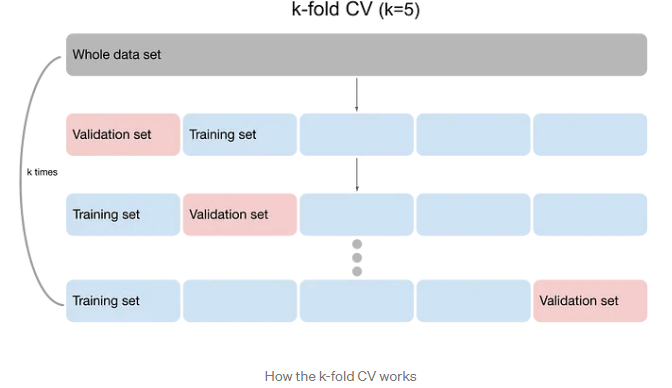

**Stratified KFold Cross Validation**

Stratified k-fold cross-validation sama dengan k-fold cross-validation, tetapi Stratified k-fold cross-validation, melakukan stratified sampling, bukan random sampling.

**Penulis akan mencoba melihat performa model dengan bootstrapping (ditujukan untuk menjawab instruksi soal). Untuk menjawab tujuan akhir analisis ini, penulis hanya menggunakan cross validation, khususnya Stratified k-fold cross-validation untuk melihat konsistensi akurasi model. Penulis memilih hanya menggunakan Cross Validation saja karena banyak sumber dengan analisis dan kasus yang sama menggunakan Cross Validation daripada bootstrapping**

### **Bootstrapping**

#### **1. Logistic Regression**

In [ ]:
# Create a Decision Tree Classifier model
model = LogisticRegression()

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 5000
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices, :]
    y_boot = y_train.iloc[indices]
    # Train the model on the bootstrap sample
    model.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))


Mean accuracy: 0.80
95% confidence interval: [0.76, 0.84]


#### **2. Decison Tree**

In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier()

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 5000
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices, :]
    y_boot = y_train.iloc[indices]
    # Train the model on the bootstrap sample
    model.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))


Mean accuracy: 0.73
95% confidence interval: [0.65, 0.82]


#### **3. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# Create a Decision Tree Classifier model
model = SVC()

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 5000
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices, :]
    y_boot = y_train.iloc[indices]
    # Train the model on the bootstrap sample
    model.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.79
95% confidence interval: [0.73, 0.85]


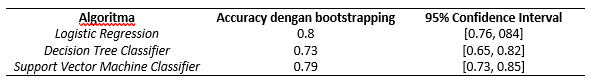

Dapat dilihat pada tabel diatas, dengan bootstrapping, Algoritma Logistic Regression memiliki accuracy tertinggi, yaitu sebesar 80%. Selanjutnya, Algoritma Support Vector Machine memiliki accuracy sebesar 79%. Nilai akurasi ini hampir sama dengan akurasi Logistic Regression. Algoritma Decision Tree memiliki akurasi terendah, yaitu sebesar 73%.

 **Untuk menjawab tujuan akhir analisis ini, penulis hanya menggunakan cross validation, khususnya Stratified k-fold cross-validation untuk melihat konsistensi akurasi model. Penulis memilih hanya menggunakan Cross Validation saja karena banyak sumber dengan analisis dan kasus yang sama menggunakan Cross Validation daripada bootstrapping**

### **Hyperparameter Tuning - Cross Validation - Model Evaluation - Model Performance**

#### **Model Baseline**

#### **1. Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Prediction of the test variable
lr_y_preds=lr.predict(X_test)

In [ ]:
`~aq@wDFEC#Training score
print("Training Score :", lr.score(X_train,y_train))
print("Testing Score :", lr.score(X_test,y_test))

Training Score : 0.8483412322274881
Testing Score : 0.8131868131868132


In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80        48
           1       0.75      0.91      0.82        43

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



 #### **2. Decision Tree**

In [ ]:
clf2=DecisionTreeClassifier(criterion='gini') #Gini Index
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Score :", clf2.score(X_train,y_train))
print("Testing Score :", clf2.score(X_test,y_test))

Training Score : 1.0
Testing Score : 0.7362637362637363


In [ ]:
Y_pred=clf2.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        48
           1       0.67      0.86      0.76        43

    accuracy                           0.74        91
   macro avg       0.75      0.74      0.73        91
weighted avg       0.76      0.74      0.73        91



#### **3. Support Vector Machine**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model_sv = SVC() # get instance of model
model_sv.fit(X_train, y_train) # Train/Fit model

y_pred_sv = model_sv.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred_sv)) # output accuracy

              precision    recall  f1-score   support

           0       0.90      0.73      0.80        48
           1       0.75      0.91      0.82        43

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [ ]:
print("Training Score :", model_sv.score(X_train,y_train))
print("Testing Score :", model_sv.score(X_test,y_test))

Training Score : 0.8815165876777251
Testing Score : 0.8131868131868132


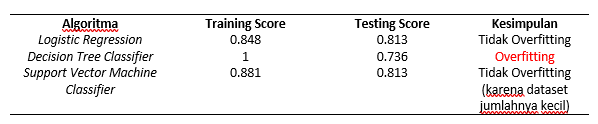

Overfitting adalah perilaku pembelajaran mesin yang tidak diinginkan yang terjadi ketika model pembelajaran mesin memberikan prediksi akurat untuk data pelatihan tetapi tidak untuk data baru. Terjadi atau tidaknya Overfitting, salah satunya dapat dilihat dari nilai akurasi data train dan data test. Terlihat bahwa, model Decision Tree memiliki akurasi yang sangat tinggi didata train, tetapi tidak didata test. Maka dari itu, terjadi overfitting untuk pemodelan dengan Decision Tree.

### **Tuning - Cross Validation - Model Performance**

#### **1. Logistic Regression**

In [ ]:
Accuracies= {} # make dictionry to save all accuracies models

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':np.logspace(-2,2,40), 'solver':['liblinear']}]

# create 10 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(lg, parameters, cv=folds, refit=True, verbose=2, scoring='accuracy', n_jobs=-1 )

# execute search
result = search.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8528138528138527
Best Hyperparameters: {'C': 1.4251026703029979, 'penalty': 'l1', 'solver': 'liblinear'}


**Model Evaluation - Model Performance**

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

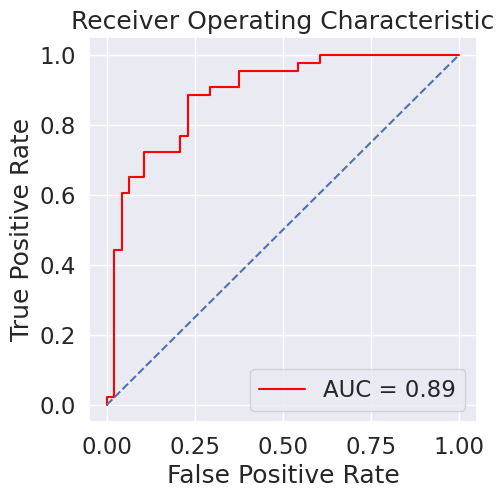

In [ ]:
Logreg = LogisticRegression(C = 1.4251026703029979, penalty = 'l1', solver='liblinear')
Logreg.fit(X_train,y_train)

y_pred=Logreg.predict(X_test)
y_proba=Logreg.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

In [ ]:
#confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

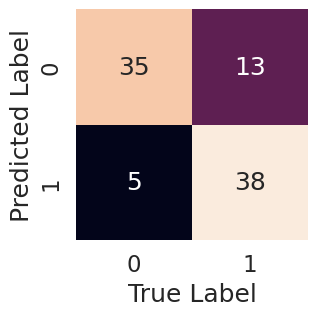

In [ ]:
#confusion matrix
plot_conf_mat(y_test,y_pred)

In [ ]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = Logreg.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = Logreg.predict(X_test)

# ROC- AUC score
print("ROC-AUC score  test dataset:", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :", f1_score(y_test,y_pred_test))

ROC-AUC score  test dataset: 0.8871124031007752
precision score  test dataset: 0.7450980392156863
Recall score  test dataset: 0.8837209302325582
f1 score  test dataset : 0.8085106382978724


#### **2. Decision Tree**


**Pemangkasan Pohon**

Decision tree yang terlalu "rimbun" seringkali akan menyebabkan overfitting. Overfitting adalah suatu kondisi dimana model menghasilkan performa yang sangat baik pada data latih, namun performa yang dihasilkan pada data uji sangat buruk.
Pada kasus model Decision tree, decision tree yang terlalu "rimbun" sering kali akan menyebabkan overfitting. Oleh karena itu, untuk mencegah terjadinya overfitting pada decision tree, digunakan teknik prunning untuk "memangkas" sebagian cabang pada decision tree, diantaranya adalah sebagai berikut.
- Preprunning: Membatasi jumlah cabang yang dibangun pada saat proses pemodelan.
- Postprunning: Terlebih dahulu dibangun pohon secara lengkap, kemudian dilakukan pemangkasan.

Terjadi Overfitting pada model ini. Penulis akan mengatasi ini dengan melakukan **Post-Pruning.**

[Text(0.484375, 0.9444444444444444, 'x[21] <= 0.5\ngini = 0.489\nsamples = 211\nvalue = [90, 121]'),
 Text(0.275, 0.8333333333333334, 'x[9] <= 0.5\ngini = 0.398\nsamples = 95\nvalue = [69, 26]'),
 Text(0.175, 0.7222222222222222, 'x[7] <= 0.348\ngini = 0.496\nsamples = 33\nvalue = [15, 18]'),
 Text(0.15, 0.6111111111111112, 'x[5] <= 0.641\ngini = 0.426\nsamples = 26\nvalue = [8, 18]'),
 Text(0.1, 0.5, 'x[6] <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.075, 0.3888888888888889, 'x[5] <= 0.625\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.05, 0.2777777777777778, 'x[12] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.025, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.075, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.3888888888888889, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2, 0.5, 'x[5] <= 0.996\ngini = 0.1

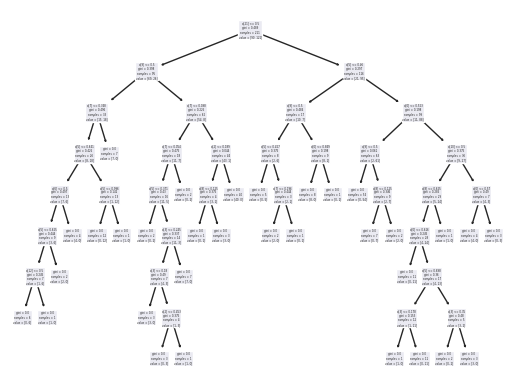

In [ ]:
#plot model baseline
plot_tree(clf2)

In [ ]:
#Post Pruning(dipangkas setelah punya pohonnya)
clf=DecisionTreeClassifier()
path=clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

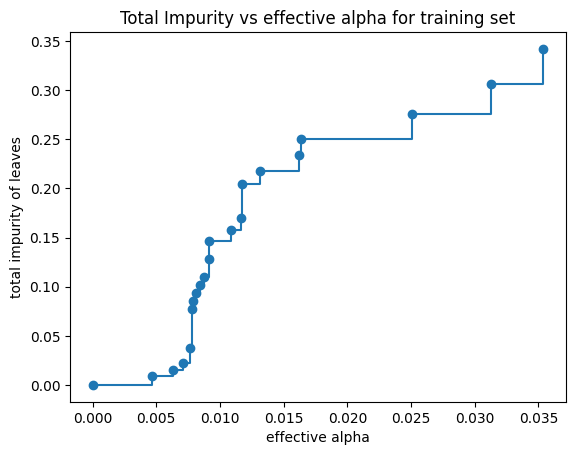

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14719325136680733


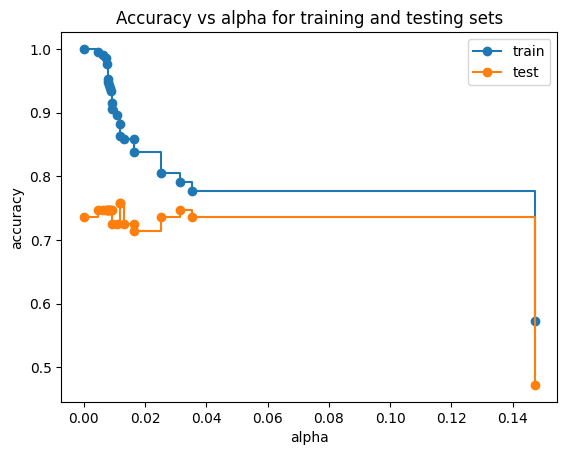

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
scores = pd.DataFrame({"train":train_scores,"test":test_scores,"alpha":ccp_alphas})
scores

,train,test,alpha
0,1.000000,0.736264,0.000000
1,0.995261,0.747253,0.004632
2,0.990521,0.747253,0.006319
3,0.985782,0.747253,0.007109
4,0.976303,0.747253,0.007617
5,0.952607,0.747253,0.007844
6,0.947867,0.747253,0.007899
7,0.943128,0.747253,0.008125
8,0.938389,0.747253,0.008425
9,0.933649,0.747253,0.008750


In [ ]:
clf2_1=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.031307) #Gini Index
clf2_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.031307)

In [ ]:
Y_pred=clf2_1.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        48
           1       0.66      0.95      0.78        43

    accuracy                           0.75        91
   macro avg       0.80      0.76      0.74        91
weighted avg       0.80      0.75      0.74        91



In [ ]:
print("Training Score :", clf2_1.score(X_train,y_train))
print("Testing Score :", clf2_1.score(X_test,y_test))

Training Score : 0.7914691943127962
Testing Score : 0.7472527472527473


[Text(0.6, 0.8333333333333334, 'x[21] <= 0.5\ngini = 0.489\nsamples = 211\nvalue = [90, 121]'),
 Text(0.4, 0.5, 'x[9] <= 0.5\ngini = 0.398\nsamples = 95\nvalue = [69, 26]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.496\nsamples = 33\nvalue = [15, 18]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.225\nsamples = 62\nvalue = [54, 8]'),
 Text(0.8, 0.5, 'gini = 0.297\nsamples = 116\nvalue = [21, 95]')]

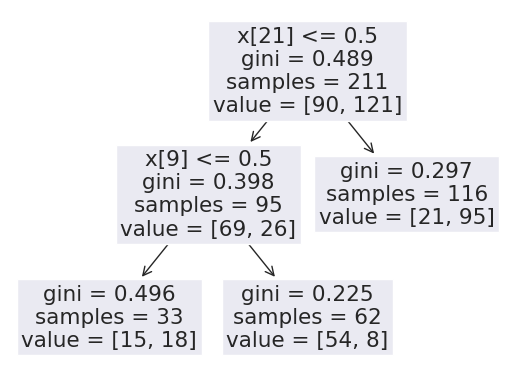

In [ ]:
plot_tree(clf2_1)

In [ ]:
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(clf2_1, X_train, y_train, cv=folds)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.73 with standard deviation 0.05


**Model Evaluation - Model Performance**

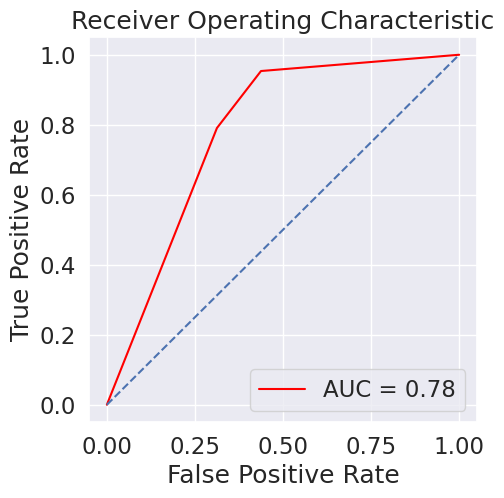

In [ ]:
#ROC Curve
y_pred=clf2_1.predict(X_test)
y_proba=clf2_1.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

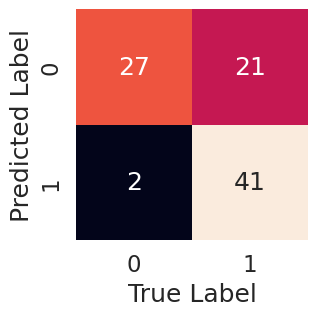

In [ ]:
#confusion matrix
plot_conf_mat(y_test,y_pred)

In [ ]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = clf2_1.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = clf2_1.predict(X_test)

# ROC- AUC score
print("ROC-AUC score  test dataset:", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :", f1_score(y_test,y_pred_test))

ROC-AUC score  test dataset: 0.7819767441860465
precision score  test dataset: 0.6612903225806451
Recall score  test dataset: 0.9534883720930233
f1 score  test dataset : 0.780952380952381


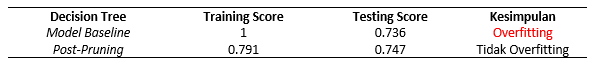

Setelah dilakukan post-pruning, model Decision Tree memiliki Training score sebesar 0.791 dan testing score sebesar 0.747. Hal ini berarti post-pruning dapat mengatasi overfitting pada pemodelan ini.

#### **3. Support Vector Machine**

In [ ]:
# define model
svc =SVC()

# parameters
parameters = [{'kernel': ['linear','rbf', 'sigmoid'],'gamma':[0.9,0.06,0.3],
        'C':[1,2,3,4,5,6],'degree':[2], 'probability':[True]}]

# create 10 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# define search
search = GridSearchCV(svc, parameters, cv=folds, scoring='accuracy')

# execute search
result = search.fit(X_train, y_train)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8530303030303029
Best Hyperparameters: {'C': 6, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True}


**Model Evaluation - Model Performance**

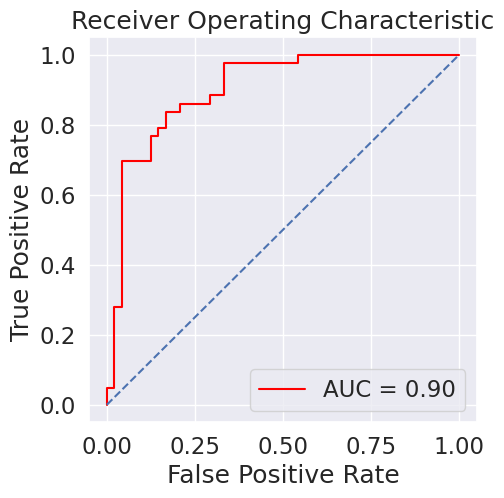

In [ ]:
sv = SVC(C=6, degree=2, gamma=0.06, kernel='rbf', probability=True)
sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)
y_proba=sv.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

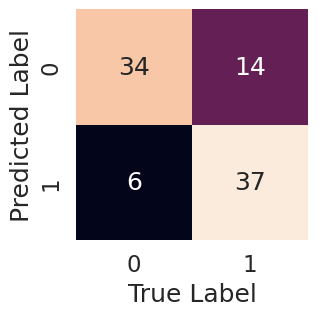

In [ ]:
#confusion matrix
plot_conf_mat(y_test,y_pred)

In [ ]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = sv.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = sv.predict(X_test)

# ROC- AUC score
print("ROC-AUC score  test dataset:", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :", f1_score(y_test,y_pred_test))

ROC-AUC score  test dataset: 0.9026162790697674
precision score  test dataset: 0.7254901960784313
Recall score  test dataset: 0.8604651162790697
f1 score  test dataset : 0.7872340425531916




---
# 5. List the model evaluation you would use to apply in the project and its justification, and evaluate the models you have created.
---



Penentuan model terbaik berdasarkan  akurasi yang diperoleh dari cross validation terhadap model klasifikasi. Selanjutnya, membandingkan nilai precision, recall dan f1-score dari model klasifikasi. Selain itu, perbandingan nilai Area Under the Curve (AUC) melalui kurva ROC.  **Kurva ROC (Receiver Operator Characteristics)** dapat digunakan untuk penyelidikan lebih lanjut ke dalam model. Kinerja model dapat divisualisasikan oleh ROC Curve dan tradeoff antara TPR (True Positive Rate) dan FPR (False Positive Rate). Ini berkisar dari 0 hingga 1 dan area di bawahnya menandakan kemampuan membedakan kelas model ML. Kurva ROC mendekati satu yang lebih mampu mengklasifikasikan.

Penilaian model klasifikasi dari masing-masing classifier akan mengacu pada confusion matrix. Confusion matrix menunjukkan prediksi dan klasifikasi terbaik melalui nilai accuracy, sensitivity, dan specificity. Ketika nilai accuracy, sensitivity, dan specificity semakin mendekati 1 (satu) maka prediksi semakin lebih baik. Hasil klasifikasi dari confusion matrix terdiri dari 4 (empat) yakni true positive, false positive, false negative, dan true negative.

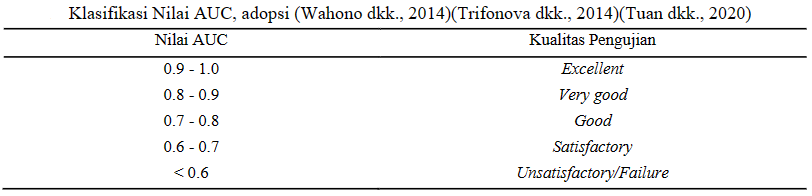

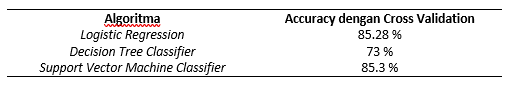

Dapat dilihat bahwa Klasifikasi dengan algoritma Logistic Regression dan Support Vector Machine Classifier memiliki akurasi yang relative sama besar, yaitu sekitar 85.3% dan lebih tinggi daripada Decision Tree Classifier (73%). Selanjutnya, akan dibandingkan nilai precision, recall, f1-score, dan AUC dari masing-masing model klasifikasi untuk meyakinkan algortitma yang terbaik digunakan.

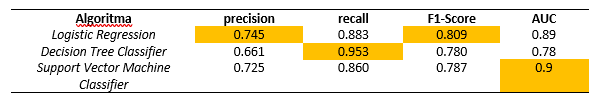

Terlihat bahwa Klasifikasi dengan algoritma **Logistic Regression** memenuhi kriteria pemilihan model terbanyak, dimana algoritma ini memiliki precision dan F1-score tertinggi diantara dua model klasifikasi lainnya. Selain itu, nilai AUC sebesar 0.89 artinya model yang terbentuk memiliki 89% area dibawah kurva. Dengan kata lain, pemodelan ini memiliki kualitas pengujian yang tergolong sangat baik. Ditambah lagi, pemodelan dengan Logistic Regression memiliki interpretabilitas model yang mudah diinterpretasikan. Maka dari itu, penulis memilih model Logistic Regression sebagai model terbaik.



---
# 7. List the feature importance from the models you have created and derive insights relating to the feature importance.
---



Klasifikasi dengan algoritma Logistic Regression merupakan model terbaik menurut penulis. Maka dari itu untuk melihat feature importance akan digunakan model Logistic Regression.

**Melalui Koefisien**

In [ ]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable
feature_dict=dict(zip(X_train.columns,list(Logreg.coef_[0])))
feature_dict

{'age': 0.0,
 'sex': -0.7913165877615715,
 'trestbps': -0.9767551046398928,
 'chol': 0.0,
 'fbs': 0.0,
 'thalach': 1.2734324435423992,
 'exang': -0.24431597073309952,
 'oldpeak': -2.2005142341704604,
 'ca': -2.255036100134531,
 'cp_0': -1.2297684456174587,
 'cp_1': 0.0,
 'cp_2': 0.7876727017555464,
 'cp_3': 0.44944241494859805,
 'restecg_0': 0.0,
 'restecg_1': 1.080325350857317,
 'restecg_2': 0.0,
 'slope_0': 0.0,
 'slope_1': 0.0,
 'slope_2': 0.474418087163551,
 'thal_0': 0.0,
 'thal_1': 0.0,
 'thal_2': 1.5312320699074273,
 'thal_3': 0.0}

<Axes: title={'center': 'Feature Importance'}>

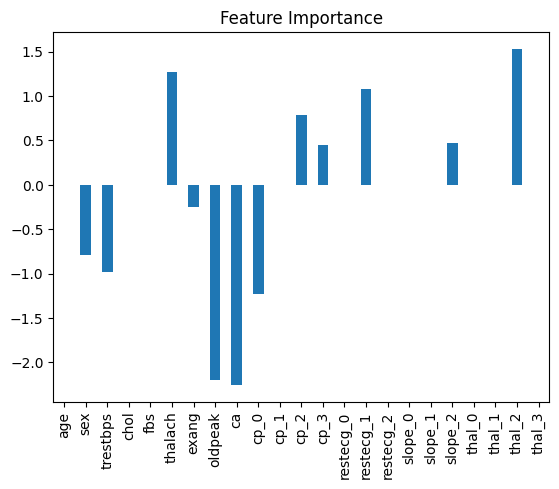

In [ ]:
#Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

**Odds Ratio**

Melalui Odds Ratio, akan memudahkan penulis untuk melihat fitur-fitur yang berperan penting dalam mendiagnosa heart disease. Dimana Odds Ratio diperoleh dari $\mathrm{e}^{\beta_i}$ dengan $\beta_i$ adalah koefisien dari masing-masing fitur.

In [ ]:
import math

In [ ]:
feature_importance = pd.DataFrame(X_train.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, Logreg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

In [ ]:
feature_importance

,feature,importance
8,ca,0.104870
7,oldpeak,0.110746
9,cp_0,0.292360
2,trestbps,0.376531
1,sex,0.453248
6,exang,0.783240
0,age,1.000000
20,thal_1,1.000000
19,thal_0,1.000000
17,slope_1,1.000000


In [ ]:
feature_importance_1 = feature_importance[feature_importance['importance'] != 1]

In [ ]:
feature_importance_1

,feature,importance
8,ca,0.104870
7,oldpeak,0.110746
9,cp_0,0.292360
2,trestbps,0.376531
1,sex,0.453248
6,exang,0.783240
12,cp_3,1.567438
18,slope_2,1.607079
11,cp_2,2.198274
14,restecg_1,2.945638


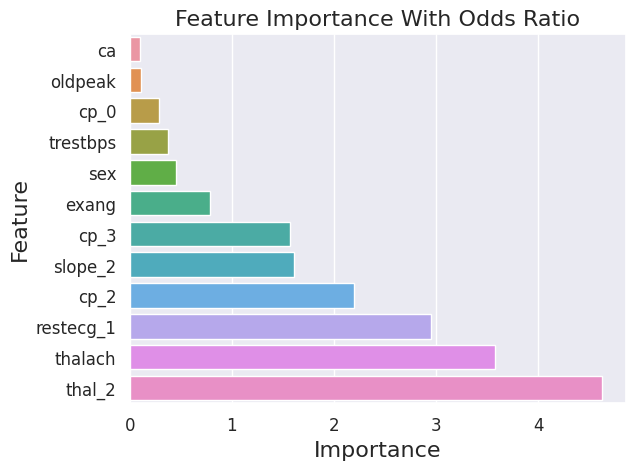

In [ ]:
sns.barplot(x=feature_importance_1['importance'], y=feature_importance_1['feature'], orient='h')
plt.xlabel('Importance', fontsize=16);
plt.ylabel('Feature', fontsize=16);
plt.title('Feature Importance With Odds Ratio', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

**Insight relating to feature importance**.

Hasil pemodelan menunjukkan bahwa setidaknya terdapat 5 feature yang berperan penting dalam memprediksi heart disease. Top 5 Feature mulai dari yang paling berpengaruh terhadap heart disease:


1.  **Thalasemia**.
  - Thalasemia atau kelainan darah bisa menimbulkan komplikasi serius, salah satunya gagal jantung. Kondisi ini disebabkan oleh kelebihan zat besi yang memicu kardiomiopati atau kelainan pada otot jantung. Bila dibiarkan tanpa penanganan, kondisi ini bisa berujung pada gagal jantung.
  - Hasil pemodelan menunjukkan bahwa **Pasien-pasein yang memiliki Thalasemia kategori 2 berisiko terkena penyakit jantung 4.6 kali lebih besar daripada pasien yang memiliki Thalasemia kategori lainnya.**
2.   **Maximum Heart Rate Achieved (thalach)**
  - Detak jantung cepat/terlalu tinggi bisa menyebabkan komplikasi serius, seperti stroke, gagal jantung, henti jantung, dan bahkan kematian
  - Hasil pemodelan menunjukkan bahwa **Kenaikan satu detak jantung maksimum permenit (bpm) berisiko pasien terkena penyakit jantung sebesar 3.57.**
3. **Resting Electrocardiographic Results**
  - Hasil pemodelan menunjukkan bahwa **Pasien dengan Resting Electrocardiographic Results memiliki ST-T wave abnormality berisiko terkena penyakit jantung 2.94 kali dibandingkan Pasien dengan Resting Electrocardiographic Results kategori lainnya.**
4. **Chest Pain Type**
  - Hasil pemodelan menunjukkan bahwa **Pasien dengan jenis nyeri dada non-anginal pain berisiko terkena penyakit jantung 2.2 kali dibandingkan Pasien dengan nyeri dada kategori lainnya.**
5. **Peak exercise ST segment (slope)**
  - Hasil pemodelan menunjukkan bahwa **Pasien dengan Peak exercise ST segment downsloping berisiko terkena penyakit jantung 1.6 kali dibandingkan Pasien dengan Peak exercise ST segment kategori lainnya.**

****
**Rekomendasi**

Pasien-pasien yang memiliki karakteristik Thalasemia kategori 2, detak jantung maksimum permenit (bpm) yang tinggi, Resting Electrocardiographic Results memiliki ST-T wave abnormality, jenis nyeri dada non-anginal pain, dan Peak exercise ST segment downsloping perlu mendapatkan treatment dan perhatian khusus agar dapat **mencegah** pasien-pasien tersebut terkena heart disease/penyakit jantung.
****
**Saran**

Untuk analisis lebih lanjut, dapat menambah dataset yang digunakan agar prediksi yang dihasilkan lebih akurat.






---
# Daftar Pustaka
---

- Apurv Garg et al. (2021). Heart disease prediction using machine learning techniques. IOP Conf. Series: Materials Science and Engineering , 1-9.
- Soni, Jyoti et al. (2011). Predictive Data Mining for Medical Diagnosis: An Overview of Heart Disease Prediction. International Journal of Computer Applications, 43-48.
- Ambrish G, B. G. (2022). Logistic regression technique for prediction of cardiovascular disease. Global Transitions Proceedings 3, 127-130.
- SENTHILKUMAR MOHAN, C. T. (2019). Effective Heart Disease Prediction Using Hybrid Machine Learning Techniques. IEEE ACCESS, 81542-81554.
- [Thalasemia Bisa Sebabkan Gagal Jantung, Ini Penyebabnya](https://www.halodoc.com/artikel/thalasemia-bisa-sebabkan-gagal-jantung-ini-penyebabnya)
